# High-Resolution Deep Convolutional Generative Adversarial Networks
J. D. Curtó, I. C. Zarza, Fernando de la Torre, Irwin King, Michael R. Lyu

## Data Preparation

In [4]:
from crawler import crawler, purify_sources

# load urls of images into local file
crawler.run()
purify_sources.purify()


initially 53 urls in the dataset
after pruning 50 urls in the dataset


In [2]:
from crawler import downloader

# download actual images into folder
downloader.run()

Downloading:  |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


In [1]:
from preprocessing import cropper

cropper.crop_to_face()

## Training

In [12]:
import tensorflow as tf
# MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train = x_train[:500,]
x_train.shape

(500, 28, 28, 1)

In [42]:
from gan.hr_dcgan import HR_DCGAN
from gan.gan import GAN

gan = HR_DCGAN(shape=(28,28,1))

gan.set_training_data(x_train)

(100,)


In [43]:
gan.train()

EPOCH 1.1 [D] loss: 8.205980, acc.: 7.81%]
EPOCH 1.2 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.3 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.4 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.5 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.6 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.7 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.8 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.9 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.10 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.11 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.12 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.13 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.14 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.15 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.16 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.17 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.18 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.19 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.20 [D] loss: 7.624619, acc.: 50.00%]
EPOCH 1.1 [G] loss: 1.524924]
EPOCH 1.2 [G] loss: 1.524924]
EPOCH 1.3 [G] loss: 1.524924]
EPOCH 1.4 [G] loss: 

In [44]:
gan.generator.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12544)             1254400   
_________________________________________________________________
batch_normalization_24 (Batc (None, 12544)             50176     
_________________________________________________________________
elu_26 (ELU)                 (None, 12544)             0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 7, 7, 128)         524288    
_________________________________________________________________
batch_normalization_25 (Batc (None, 7, 7, 128)         512       
_________________________________________________________________
elu_27 (ELU)                 (None, 7, 7, 128)       

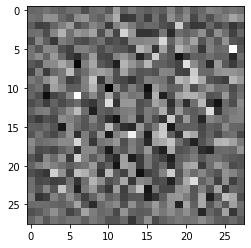

In [46]:
import matplotlib.pyplot as plt

img = gan.generate()
plt.imshow(img[0, :,:,0], cmap='gray')
plt.show()